# SEGMENTATION TECHNIQUES

In [2]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable


# THRESHOLDING

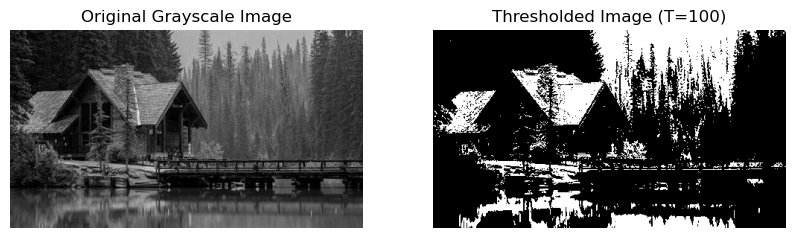

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # Using PIL to open the image

# Load the image and convert it to grayscale
image = Image.open(r"C:\Users\student\Downloads\home.jfif").convert("L")  # Convert to grayscale
image_np = np.array(image)  # Convert to NumPy array

# Define a threshold value
threshold = 100 # Adjust this value as needed

# Apply thresholding manually
binary_image = np.where(image_np > threshold, 255, 0)  # Pixels above threshold -> white, else black

# Display the original and thresholded image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap="gray")
plt.title(f"Thresholded Image (T={threshold})")
plt.axis("off")

plt.show()


# GRAB CUT SEGMENTATION

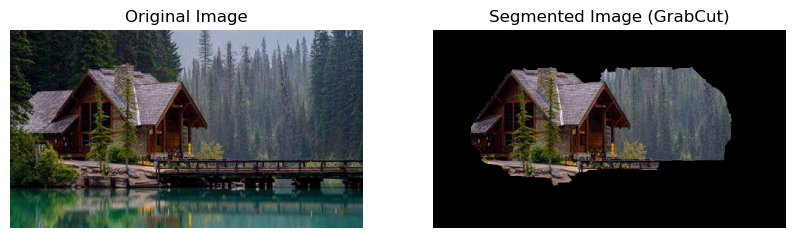

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\student\Downloads\home.jfif")  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

# Create an initial mask
mask = np.zeros(image.shape[:2], np.uint8)

# Background and foreground models (used internally)
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a bounding box around the object: (x, y, width, height)
rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100)  # Adjust as needed

# Apply GrabCut
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Process mask: 0,2 -> Background, 1,3 -> Foreground
mask_final = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

# Apply mask to extract the foreground
segmented_image = image * mask_final[:, :, np.newaxis]

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (GrabCut)")
plt.axis("off")

plt.show()


# MEAN SHIFTING

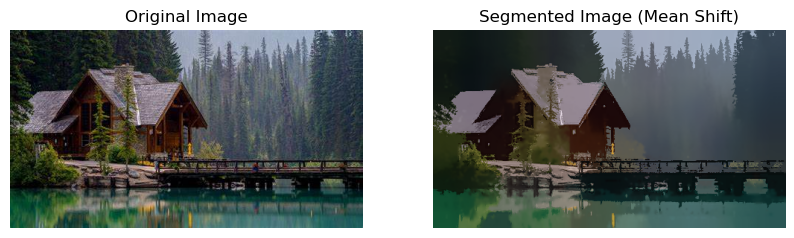

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\student\Downloads\home.jfif")  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

# Apply Mean Shift Filtering
segmented_image = cv2.pyrMeanShiftFiltering(image, sp=20, sr=40)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (Mean Shift)")
plt.axis("off")

plt.show()


# REGION GROWING

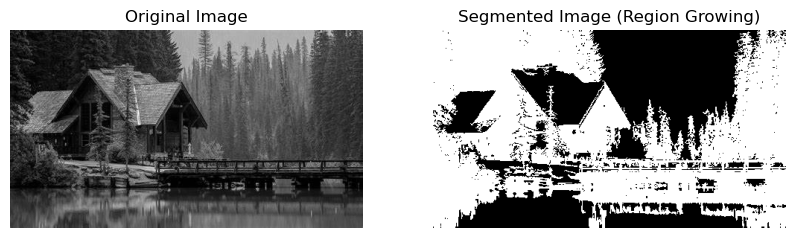

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the grayscale image correctly
image_path = r"C:\Users\student\Downloads\home.jfif"  # Use raw string for Windows paths
image = Image.open(image_path).convert("L")  # Convert to grayscale
image_np = np.array(image)

# Define seed point (choose manually)
seed_x, seed_y = 150, 120 # Change as needed

# Define threshold for pixel similarity
threshold = 50

# Create an empty mask for segmentation
segmented = np.zeros_like(image_np, dtype=np.uint8)

# Stack for region growing
stack = [(seed_x, seed_y)]
visited = set()  # To track visited pixels

# Get image dimensions
height, width = image_np.shape

# 8-connected neighborhood (allows diagonal connections)
neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

# Region Growing Algorithm
while stack:
    x, y = stack.pop()
    if (x, y) in visited:
        continue
    visited.add((x, y))

    # Check intensity difference with seed pixel
    if abs(int(image_np[x, y]) - int(image_np[seed_x, seed_y])) < threshold:
        segmented[x, y] = 255  # Mark as foreground

        # Add neighbors to the stack
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy
            if 0 <= nx < height and 0 <= ny < width and (nx, ny) not in visited:
                stack.append((nx, ny))

# Display the original and segmented image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap="gray")
plt.title("Segmented Image (Region Growing)")
plt.axis("off")

plt.show()


# K MEANS CLUSTERING

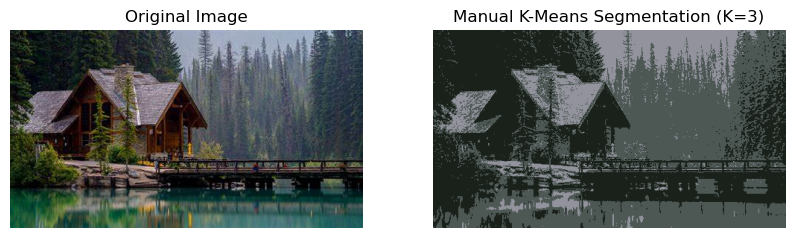

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\student\Downloads\home.jfif")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image.reshape((-1, 3))  
pixels = np.float32(pixels)  
K = 3
np.random.seed(42) 
random_indices = np.random.choice(len(pixels), K, replace=False)
centers = pixels[random_indices]
max_iters = 100  
for _ in range(max_iters):
    # Step 2: Assign each pixel to the nearest cluster center
    distances = np.linalg.norm(pixels[:, np.newaxis] - centers, axis=2)  # Euclidean distance
    labels = np.argmin(distances, axis=1)  # Assign each pixel to the closest center

    # Step 3: Compute new cluster centers
    new_centers = np.array([pixels[labels == k].mean(axis=0) if np.any(labels == k) else centers[k] for k in range(K)])

    # Stop if centers do not change significantly
    if np.allclose(centers, new_centers, atol=1e-3):
        break

    centers = new_centers  # Update centers

# Replace pixel values with their cluster centers
segmented_pixels = centers[labels]
segmented_image = segmented_pixels.reshape(image.shape)  # Reshape back to image

# Convert back to uint8 for display
segmented_image = np.uint8(segmented_image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"Manual K-Means Segmentation (K={K})")
plt.axis("off")

plt.show()
